Problem Statement:

To classify Reuters newswires into 46 mutually exclusive topics. This problem is an instance of multi- class classification; and because each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification.

An approach using a Sequential neural network with three dense layers is presented.



In [1]:
import tensorflow
import numpy as np
from keras import layers
from keras import models

In [2]:
from keras import optimizers
from keras import losses
from keras import metrics


In [3]:
import tensorflow

In [4]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [6]:
x_train = vectorize(train_data, 10000)


In [7]:
x_test = vectorize(test_data, 10000)

In [8]:
def one_hot_encoding(sequences, dimension = 46):
  op = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    op[i, sequence] = 1
  return op 

In [9]:
y_train = one_hot_encoding(train_labels, 46)
y_test = one_hot_encoding(test_labels, 46)

In [10]:
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Sequential


In [11]:
network = models.Sequential()
network.add(layers.Dense(64, input_shape = (10000,), activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(46, activation = 'softmax'))


In [30]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [12]:
network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]



In [14]:
history = network.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 3.1767 - accuracy: 0.3801 - val_loss: 1.7810 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.5406 - accuracy: 0.6791 - val_loss: 1.3092 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0842 - accuracy: 0.7708 - val_loss: 1.1246 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8367 - accuracy: 0.8261 - val_loss: 1.0383 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6534 - accuracy: 0.8673 - val_loss: 0.9614 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5427 - accuracy: 0.8889 - val_loss: 0.9360 - val_accuracy: 0.8170
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4417 - accuracy: 0.9085 - val_loss: 0.8969 - val_accuracy: 0.8210
Epoch 8/20
16

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

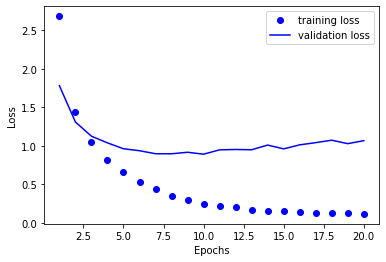

In [17]:
epochs =  range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

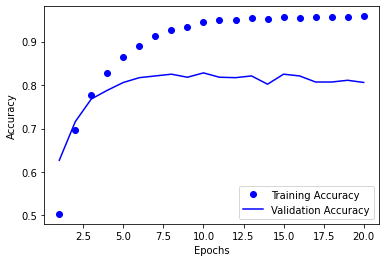

In [18]:
epochs =  range(1, len(loss_values)+1)
plt.plot(epochs, accuracy_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
network = models.Sequential()
network.add(layers.Dense(64, input_shape = (10000,), activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(46, activation = 'softmax'))

network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = network.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))


Epoch 1/9
16/16 [==============================] - 1s 58ms/step - loss: 3.2190 - accuracy: 0.4003 - val_loss: 1.7869 - val_accuracy: 0.6460
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.5680 - accuracy: 0.6889 - val_loss: 1.2889 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 1.0876 - accuracy: 0.7683 - val_loss: 1.1010 - val_accuracy: 0.7660
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8573 - accuracy: 0.8209 - val_loss: 1.0146 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.6720 - accuracy: 0.8630 - val_loss: 0.9453 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5366 - accuracy: 0.8868 - val_loss: 0.8989 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4198 - accuracy: 0.9159 - val_loss: 0.8746 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

In [20]:
network.evaluate(x_test, y_test)
#this has been done using the model of one hot encoiding the y values and then  Categorical cross entropy
#this gives an accuracy of 77.42 percentage

71/71 [==============================] - 0s 2ms/step - loss: 0.9572 - accuracy: 0.7841


[0.9571688771247864, 0.784060537815094]

In [21]:
y_predicted = network.predict(x_test)

In [22]:
y_predicted

array([[1.3429775e-04, 1.2699326e-03, 1.0065931e-04, ..., 9.8077297e-05,
        5.7847042e-06, 1.3793041e-05],
       [3.8449585e-03, 1.3168562e-02, 4.7686186e-05, ..., 1.9056881e-05,
        6.9680759e-06, 2.8949005e-06],
       [5.6239491e-04, 9.3450266e-01, 9.0840540e-04, ..., 8.5175925e-05,
        1.8805559e-04, 3.6620437e-05],
       ...,
       [2.6840105e-05, 8.9121189e-05, 1.7499043e-04, ..., 1.3657882e-04,
        1.5987238e-05, 3.0496105e-05],
       [3.0368911e-03, 6.4361624e-02, 9.4731944e-03, ..., 9.6845540e-04,
        6.5309770e-04, 5.4249086e-04],
       [1.5418696e-04, 6.1604691e-01, 6.9789444e-03, ..., 3.4553272e-05,
        3.5925899e-04, 3.1804793e-06]], dtype=float32)

In [23]:
y_predictions_number = [np.argmax(elem) for elem in y_predicted]

(array([ 11., 131.,  21., 803., 561.,   0.,  16.,   1.,  44.,  23.,  27.,
        110.,   4.,  45.,   0.,   4.,  93.,   2.,  21., 142.,  59.,  23.,
          0.,   0.,   9.,  11.,  18.,   5.,   1.,   4.,   2.,   7.,  12.,
          6.,   3.,   5.,   1.,   5.,   3.,   1.,   0.,   1.,   2.,   1.,
          4.,   4.]),
 array([ 0.        ,  0.95652174,  1.91304348,  2.86956522,  3.82608696,
         4.7826087 ,  5.73913043,  6.69565217,  7.65217391,  8.60869565,
         9.56521739, 10.52173913, 11.47826087, 12.43478261, 13.39130435,
        14.34782609, 15.30434783, 16.26086957, 17.2173913 , 18.17391304,
        19.13043478, 20.08695652, 21.04347826, 22.        , 22.95652174,
        23.91304348, 24.86956522, 25.82608696, 26.7826087 , 27.73913043,
        28.69565217, 29.65217391, 30.60869565, 31.56521739, 32.52173913,
        33.47826087, 34.43478261, 35.39130435, 36.34782609, 37.30434783,
        38.26086957, 39.2173913 , 40.17391304, 41.13043478, 42.08695652,
        43.04347826, 44. 

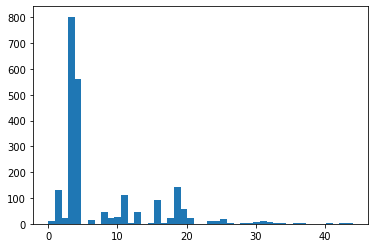

In [24]:
plt.hist(y_predictions_number, bins = 46)

In [25]:
#to probe later - baseline comparison
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)
0.18655387355298308

0.18655387355298308

In [26]:
#trying the same example with a integer encoding of the output
y_train = np.array(train_labels)
y_test = np.array(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]



In [27]:
network = models.Sequential()
network.add(layers.Dense(64, input_shape = (10000,), activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(46, activation = 'softmax'))

network.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = network.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))
scores = network.evaluate(x_test, y_test)

Epoch 1/9
16/16 [==============================] - 1s 58ms/step - loss: 3.0360 - accuracy: 0.3511 - val_loss: 1.7076 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 1s 48ms/step - loss: 1.4753 - accuracy: 0.6982 - val_loss: 1.3204 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 1.1063 - accuracy: 0.7673 - val_loss: 1.1423 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8709 - accuracy: 0.8089 - val_loss: 1.0435 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6880 - accuracy: 0.8518 - val_loss: 0.9911 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.5549 - accuracy: 0.8855 - val_loss: 0.9393 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 57ms/step - loss: 0.4360 - accuracy: 0.9078 - val_loss: 0.9096 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

In [28]:
#result using integer encoding, sparse_categorical_crossentropy
#this gives an almost similar value - but slightly different 78.67 %
scores

[1.0058329105377197, 0.7818343639373779]